In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
row_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([row_df.values[::2, :], row_df.values[1::2, :2]])
target = row_df.values[1::2, 2]

In [14]:
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

y = pd.DataFrame(target, columns=["PRICE"])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [17]:
model = Sequential()

In [19]:
"""
hidden layer의 개수는 어떻게 정하는 게 좋을까?
1. 데이터가 적으면 layer도 적게 쓰자 (많아지면 과적합 확률 증가)
2. 컴퓨터 사양이 안 좋으면 layer 적게 쓰자 (많아지면 학습시간 증가)
"""

# input layer
model.add(Dense(32, activation="relu", input_shape=(x.columns.size, )))

# hidden layer
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

# output layer
# linear : a(X) = X
model.add(Dense(1, activation="linear"))

c:\Users\user\anaconda3\envs\multi02_tensor\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss="mse", optimizer="adam")

In [21]:
result = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.3)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 217.7401 - val_loss: 106.7074
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.5761 - val_loss: 77.4099
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.1559 - val_loss: 75.2860
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.2872 - val_loss: 82.1510
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.2810 - val_loss: 74.3626
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.8156 - val_loss: 74.2387
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.7583 - val_loss: 88.2367
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.6232 - val_loss: 67.5189
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.7843 - val_loss: 64.0768
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.6050 - val_loss: 80.5265
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.8281 - val_loss: 61.6260
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━

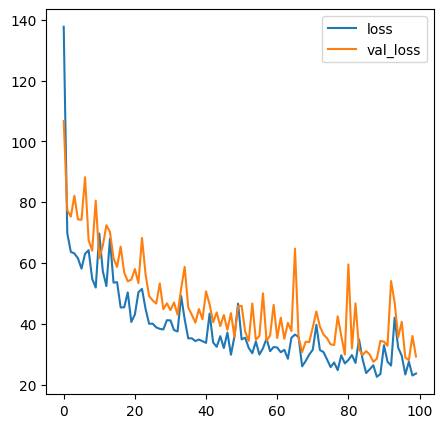

In [22]:
plt.figure(figsize=(5, 5))

plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["val_loss"], label="val_loss")

plt.legend()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.4741


29.2847843170166

In [24]:
predict = model.predict(x_test)
y_test["predict"] = predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


In [25]:
y_test

,PRICE,predict
307,28.2,33.654430
343,23.9,32.018127
47,16.6,19.277832
67,22.0,28.228691
362,20.8,24.714464
...,...,...
467,19.1,16.250055
95,28.4,24.517796
122,20.5,20.760313
260,33.8,30.389303
